In [246]:
import numpy as np
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
import seaborn as sns


In [ ]:
# Cargar features con reduccion de la dimensionalidad UMAP
df_umap = pd.read_csv("movies_umap.csv") 
umap_cols = [c for c in df_umap.columns if c.lower().startswith("UMAP_") or c.startswith("UM")]
df_umap

,UMAP_1,UMAP_2,UMAP_3,UMAP_4,UMAP_5,UMAP_6,UMAP_7,UMAP_8,UMAP_9,UMAP_10,...,UMAP_41,UMAP_42,UMAP_43,UMAP_44,UMAP_45,UMAP_46,UMAP_47,UMAP_48,UMAP_49,UMAP_50
0,13.143850,-2.688250,0.387024,7.358764,7.956812,2.754460,7.911511,3.387040,8.866409,4.499035,...,5.817903,3.732245,6.325901,6.322545,3.753850,5.435488,5.785661,4.817102,4.274406,3.154240
1,10.433544,-3.476414,0.053603,6.479012,6.867066,2.963468,6.978748,1.633253,8.608798,4.660694,...,5.624111,3.782275,6.343811,6.241780,4.034023,5.510973,5.291336,4.496783,4.207539,3.536255
2,12.680239,-2.098583,0.168356,6.887689,7.585602,2.607404,7.524177,2.498615,8.575580,5.023791,...,5.863074,3.691669,6.145290,6.159943,3.649047,5.632483,5.860766,4.699210,4.319173,3.074840
3,13.724881,-1.666713,-0.153348,7.346939,8.176625,2.701701,7.954100,3.211546,8.758096,4.645825,...,5.890904,3.850462,6.419383,6.266000,3.657001,5.435316,5.715437,4.782519,4.423212,3.102191
4,11.875217,-3.150916,-0.224169,7.088984,7.464766,2.922944,7.442156,2.505810,8.789417,4.390854,...,5.694795,3.896252,6.546053,6.346869,3.993293,5.369664,5.300050,4.596529,4.344412,3.484569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5826,11.494631,-2.378734,-0.838472,6.836111,7.281667,3.092124,7.145963,2.018476,8.412745,4.559771,...,5.620698,4.150621,6.780458,6.181571,4.149388,5.335460,4.829121,4.503533,4.732817,3.777708
5827,11.556287,-2.799545,-0.751991,7.052041,7.381698,2.997706,7.325535,2.376806,8.658731,4.383640,...,5.644777,4.094115,6.764883,6.289984,4.157539,5.310686,4.999765,4.594551,4.645365,3.700979
5828,11.057945,-2.849812,-0.592217,6.658507,6.990992,2.866521,6.986014,1.633088,8.499553,4.778855,...,5.675341,3.943255,6.499517,6.204163,4.035364,5.500079,5.178499,4.468756,4.490570,3.574632
5829,13.904206,-2.064901,-0.209325,7.313708,7.863161,2.628099,7.625077,2.670505,8.569582,4.909344,...,5.901763,3.784222,6.300350,6.240551,3.580834,5.543435,5.704782,4.540040,4.355196,3.090956


In [ ]:
print("Convertir a matriz numpy UMAP")
X_umap = df_umap[umap_cols].to_numpy(dtype=float)
X_umap 


Convertir a matrices numpy PCA y UMAP


array([[13.14385   , -2.68825   ,  0.38702354, ...,  4.817102  ,
         4.2744064 ,  3.1542401 ],
       [10.433544  , -3.476414  ,  0.05360271, ...,  4.496783  ,
         4.207539  ,  3.536255  ],
       [12.680239  , -2.0985832 ,  0.16835627, ...,  4.69921   ,
         4.319173  ,  3.0748398 ],
       ...,
       [11.057945  , -2.8498123 , -0.59221697, ...,  4.4687557 ,
         4.4905705 ,  3.5746324 ],
       [13.904206  , -2.0649009 , -0.20932546, ...,  4.5400405 ,
         4.3551965 ,  3.0909557 ],
       [12.898723  , -3.072202  ,  0.43323714, ...,  4.688361  ,
         4.1154933 ,  3.1599598 ]], shape=(5831, 50))

In [ ]:
def shape_info(X):
    n_total = X.shape[0]
    print(f" Total de películas disponibles: {n_total}")
    
    # Tomar una muestra representativa
    np.random.seed(42) 
    sample_size = 5831 
    idx_sample = np.random.choice(n_total, sample_size, replace=False)
    X_sample = X[idx_sample]

    print(f" Muestra seleccionada: {X_sample.shape[0]} películas ({X_sample.shape[1]} features)")
    return X_sample

In [ ]:
# Estandarización de datos
def estandarizar(X_sample):
    mu = X_sample.mean(axis=0, keepdims=True)
    sigma = X_sample.std(axis=0, ddof=0, keepdims=True)
    sigma[sigma == 0] = 1
    X_std = (X_sample - mu) / sigma
    X_std = X_std.astype(np.float32)
    print(f" Datos estandarizados: media ~ {X_std.mean(axis=0).round(2)}, std ~ {X_std.std(axis=0, ddof=0).round(2)}")
    return X_std

In [ ]:
# Average linkage (UPGMA) con distancia coseno o angular

def hac_average_cosine(X):
    """
    Hierarchical Agglomerative Clustering (Average linkage)
    con distancia coseno 
    """
    n = X.shape[0]
    # matriz de distancia coseno
    dot = np.dot(X, X.T)
    norm = np.linalg.norm(X, axis=1, keepdims=True)
    sim = dot / (norm @ norm.T)
    D = 1 - sim  
    np.fill_diagonal(D, np.inf)

    sizes = np.ones(n, dtype=int)
    active = np.ones(n, dtype=bool)
    merges = []
    id_map = {i: i for i in range(n)}
    next_id = n

    start = time.time()
    for step in range(n - 1):
        i, j = np.unravel_index(np.argmin(D), D.shape)
        d_min = D[i, j]

        size_a, size_b = sizes[i], sizes[j]
        new_size = size_a + size_b

        merges.append((id_map[i], id_map[j], float(d_min), int(new_size)))

        # Actualizar distancias según Average linkage:
        for k in range(n):
            if not active[k] or k == i or k == j:
                continue
            D[i, k] = D[k, i] = (size_a * D[i, k] + size_b * D[j, k]) / (size_a + size_b)

        D[j, :] = np.inf
        D[:, j] = np.inf
        sizes[i] = new_size
        active[j] = False
        id_map[i] = next_id
        del id_map[j]
        next_id += 1

        if step % 100 == 0:
            print(f"Paso {step}/{n-1} | Distancia promedio={d_min:.4f}")

    print(f" Finalizado en {(time.time()-start)/60:.2f} minutos")
    return merges


#  Grafica la distancia de fusión (angular promedio) en cada paso del clustering jerárquico
def plot_merge_distances_average(merges):
    d = np.array([m[2] for m in merges])

    plt.figure(figsize=(8,4))
    plt.plot(np.arange(1, len(d)+1), d, lw=1.2, color='darkorange')
    plt.xlabel("Paso de fusión")
    plt.ylabel("Distancia angular promedio")
    plt.title("Curva de distancias de fusión (Average Linkage + Angular)")
    plt.grid(True, alpha=0.3)
    plt.axhline(y=1.0, color='red', linestyle='--', label='Posible punto de corte')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Reconstruye cluster jerarquico para corte a K clusters
def labels_from_merges(n, merges, k):
    # Inicializa cada punto es su propio cluster
    clusters = {i: [i] for i in range(n)}
    next_id = n

    for (a, b, dist, size) in merges:
        if len(clusters) <= k:
            break

        # Recupera los miembros de a y b (si ya fueron fusionados)
        members_a = clusters.pop(a, None)
        if members_a is None:
            for key, val in clusters.items():
                if a in val:
                    members_a = val
                    del clusters[key]
                    break

        members_b = clusters.pop(b, None)
        if members_b is None:
            for key, val in clusters.items():
                if b in val:
                    members_b = val
                    del clusters[key]
                    break

        # Fusiona ambos conjuntos
        clusters[next_id] = members_a + members_b
        next_id += 1

    # Asigna etiquetas
    labels = [0] * n
    for label, points in enumerate(clusters.values()):
        for p in points:
            labels[p] = label
    return labels


In [ ]:
#--- EJECTUTAR ----# 

X_sample_umap = shape_info(X_umap)

X_std_umap = estandarizar(X_sample_umap)



 Total de películas disponibles: 5831
 Muestra seleccionada: 5831 películas (50 features)
 Datos estandarizados: media ~ [ 0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0.  0.  0. -0. -0. -0.
  0.  0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0.
  0. -0.  0. -0. -0. -0.  0. -0.  0. -0.  0.  0.  0.  0.], std ~ [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [ ]:
# Calcula merges con Average Linkage + Distancia Coseno
merges_lance_umap_B = hac_average_cosine(X_std_umap)

Paso 0/5830 | Distancia promedio=0.0000
Paso 100/5830 | Distancia promedio=0.0002
Paso 200/5830 | Distancia promedio=0.0003
Paso 300/5830 | Distancia promedio=0.0004
Paso 400/5830 | Distancia promedio=0.0005
Paso 500/5830 | Distancia promedio=0.0006
Paso 600/5830 | Distancia promedio=0.0007
Paso 700/5830 | Distancia promedio=0.0008
Paso 800/5830 | Distancia promedio=0.0009
Paso 900/5830 | Distancia promedio=0.0011
Paso 1000/5830 | Distancia promedio=0.0012
Paso 1100/5830 | Distancia promedio=0.0014
Paso 1200/5830 | Distancia promedio=0.0015
Paso 1300/5830 | Distancia promedio=0.0017
Paso 1400/5830 | Distancia promedio=0.0019
Paso 1500/5830 | Distancia promedio=0.0021
Paso 1600/5830 | Distancia promedio=0.0022
Paso 1700/5830 | Distancia promedio=0.0024
Paso 1800/5830 | Distancia promedio=0.0027
Paso 1900/5830 | Distancia promedio=0.0029
Paso 2000/5830 | Distancia promedio=0.0032
Paso 2100/5830 | Distancia promedio=0.0034
Paso 2200/5830 | Distancia promedio=0.0036
Paso 2300/5830 | Distan

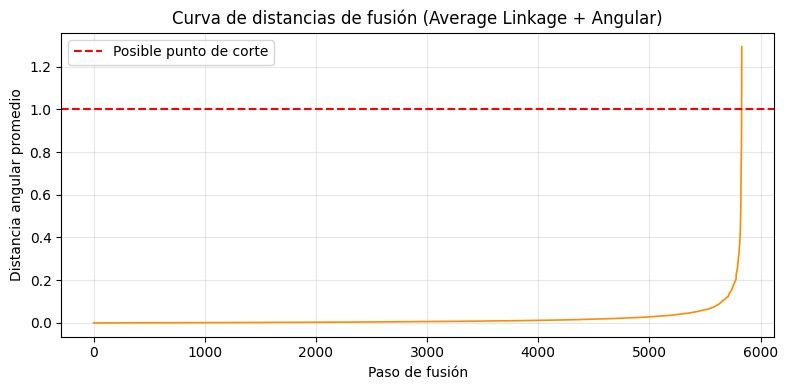

🔹 Total de fusiones realizadas: 5830
🔹 Última distancia de fusión: 1.2933


In [ ]:
# Visualiza distancias de fusión
plot_merge_distances_average(merges_lance_umap_B)
print(f"🔹 Total de fusiones realizadas: {len(merges_lance_umap_B)}")
print(f"🔹 Última distancia de fusión: {merges_lance_umap_B[-1][2]:.4f}")

La curva muestra que las fusiones iniciales ocurren con distancias pequeñas, indicando alta similitud entre películas. Hacia el final se observa un salto brusco (≈ 1.29), lo que sugiere que a partir de ese punto se están uniendo grupos muy distintos. Este cambio marca el punto en que las fusiones comienzan a unir grupos muy distintos, por lo que cortar el dendrograma justo antes de esa subida permite conservar la estructura natural del conjunto. Por ello, se seleccionó un rango entre 4 y 6 clusters como el más representativo.

In [ ]:
# Etiquetas para k clusters
k = 5
labels = labels_from_merges(X_std_umap.shape[0], merges_lance_umap_B, k)

df_clusters  = df_umap.copy()
df_clusters["cluster_hier"] = labels

cluster_sizes = df_clusters["cluster_hier"].value_counts().sort_index()
cluster_sizes



cluster_hier
0       2
1     702
2    1519
3    2410
4    1198
Name: count, dtype: int64

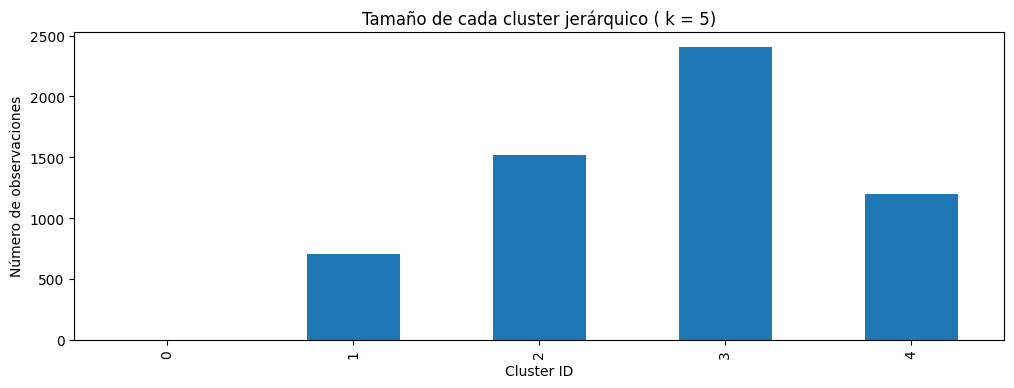

In [ ]:
# Tamaño de cada cluster
cluster_sizes.plot(kind="bar", figsize=(12,4))
plt.title(f"Tamaño de cada cluster jerárquico ( k = {k})")
plt.xlabel("Cluster ID")
plt.ylabel("Número de observaciones")
plt.show()

In [257]:
# --------- METRICAS ----------# 

# -------- DISTANCIAS -------- #
def pairwise_distances_cosine(X):
    """
    Calcula la distancia coseno entre filas de X.
    Devuelve matriz D de tamaño n x n.
    D_ij = 1 - cos(x_i, x_j)
    """
    sim = np.dot(X, X.T)
    norm = np.linalg.norm(X, axis=1, keepdims=True)
    cos = sim / (norm @ norm.T)
    D = np.arccos(cos) / np.pi    
    np.fill_diagonal(D, 0.0)
    return D

# -------- SILHOUETTE -------- #
def silhouette_score_manual_cosine(X, labels, verbose=True):
    start = time.time()
    n = X.shape[0]
    unique_labels = np.unique(labels)
    D = pairwise_distances_cosine(X)
    
    sil = np.zeros(n, dtype=float)
    for i in range(n):
        ci = labels[i]
        same = (labels == ci)
        other = (labels != ci)

        if same.sum() > 1:
            ai = D[i, same].sum() / (same.sum() - 1)
        else:
            ai = 0.0

        bi = np.inf
        for cj in unique_labels:
            if cj == ci:
                continue
            mask = (labels == cj)
            bi = min(bi, D[i, mask].mean())

        sil[i] = (bi - ai) / max(ai, bi) if max(ai, bi) > 0 else 0.0

        if verbose and i % 500 == 0:
            print(f"Progreso: {i}/{n} puntos procesados...")

    sil_mean = sil.mean()
    print(f"\n Silhouette promedio (coseno): {sil_mean:.4f}")
    print(f" Tiempo total: {(time.time()-start)/60:.2f} minutos")

    return sil_mean, sil

# -------- Davies–Bouldin -------- #
def davies_bouldin_index(X, labels):
    import numpy as np
    unique = np.unique(labels)
    centroids = np.array([X[labels==c].mean(axis=0) for c in unique])
    scatters = np.array([np.mean(np.linalg.norm(X[labels==c]-centroids[i], axis=1))
                        for i, c in enumerate(unique)])
    D = pairwise_distances_cosine(centroids)
    db_vals = []
    for i in range(len(unique)):
        ratios = (scatters[i] + scatters) / (D[i] + 1e-8)
        ratios[i] = 0
        db_vals.append(np.max(ratios))
    return np.mean(db_vals)


# -------- Índice Calinski–Harabasz -------- #
def calinski_harabasz_index(X, labels):
    import numpy as np
    n, m = X.shape
    unique = np.unique(labels)
    k = len(unique)
    overall_mean = X.mean(axis=0)
    B = 0.0  # entre-clusters
    W = 0.0  # dentro-clusters
    for c in unique:
        Xc = X[labels == c]
        n_c = Xc.shape[0]
        mean_c = Xc.mean(axis=0)
        B += n_c * np.sum((mean_c - overall_mean)**2)
        W += np.sum((Xc - mean_c)**2)
    return (B / (k - 1)) / (W / (n - k))



In [258]:
labels_array = np.array(labels)
sil_mean, sil_vec = silhouette_score_manual_cosine(X_std_umap, labels_array)

print(f"\n - Silhouette (Average + coseno): {sil_mean:.4f}")

dbi = davies_bouldin_index(X_std_umap, labels_array)
print(f"\n - Davies - Bouldin: {dbi:.4f}")

chi = calinski_harabasz_index(X_std_umap, labels_array)
print(f"\n - Calinski - Harabasz: {chi:.2f}")

C:\Users\ZJ6638\AppData\Local\Temp\ipykernel_13664\3867496166.py:13: RuntimeWarning: invalid value encountered in arccos
  D = np.arccos(cos) / np.pi


Progreso: 0/5831 puntos procesados...
Progreso: 500/5831 puntos procesados...
Progreso: 1000/5831 puntos procesados...
Progreso: 1500/5831 puntos procesados...
Progreso: 2000/5831 puntos procesados...
Progreso: 2500/5831 puntos procesados...
Progreso: 3000/5831 puntos procesados...
Progreso: 3500/5831 puntos procesados...
Progreso: 4000/5831 puntos procesados...
Progreso: 4500/5831 puntos procesados...
Progreso: 5000/5831 puntos procesados...
Progreso: 5500/5831 puntos procesados...

 Silhouette promedio (coseno): 0.2702
 Tiempo total: 0.11 minutos

 - Silhouette (Average + coseno): 0.2702

 - Davies - Bouldin: 17.1043

 - Calinski - Harabasz: 1917.82


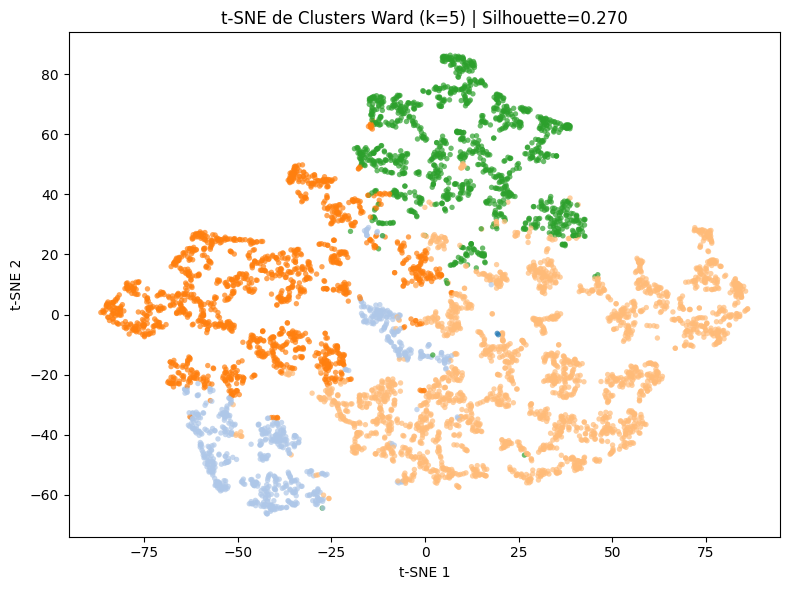

In [259]:
#----- VISUALIZADOR TSNE -----# 
tsne = TSNE(
    n_components=2,
    perplexity=30,       
    learning_rate=200,   
    random_state=42
)
X_tsne = tsne.fit_transform(X_std_umap)   

# Visualizar los clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=labels,      
    palette='tab20',   
    s=15, alpha=0.7, linewidth=0
)
plt.title(f"t-SNE de Clusters Ward (k={len(np.unique(labels))}) | Silhouette={sil_mean:.3f}")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend([],[],frameon=False)
plt.tight_layout()
plt.show()

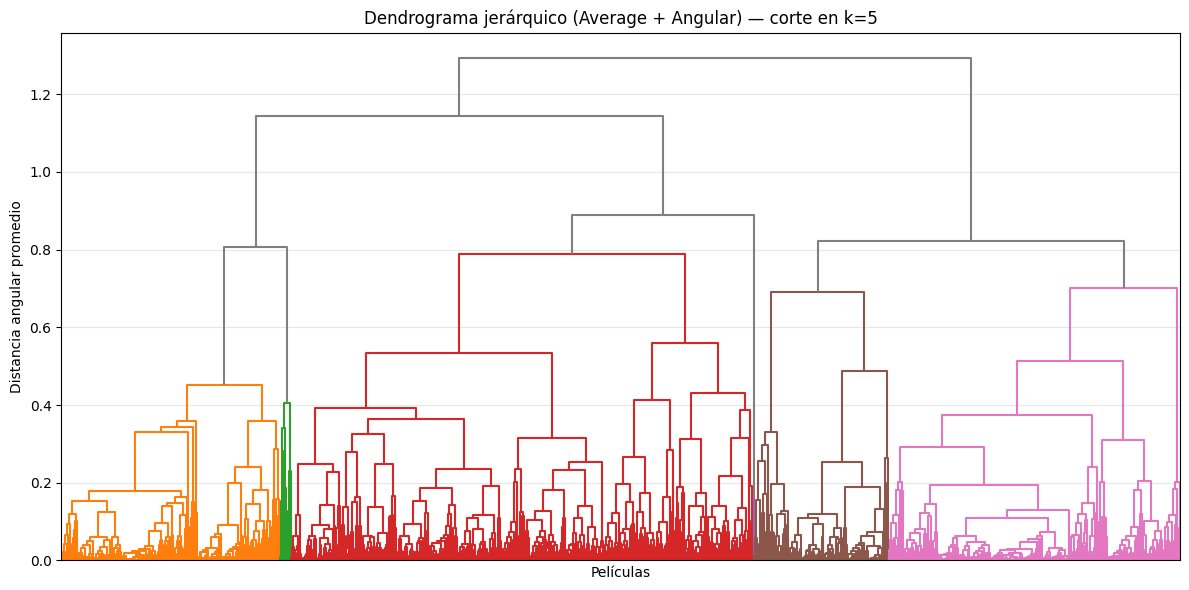

In [260]:
#--- VISUALIZAR DENDOGRAMA ---# 
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, fcluster
import numpy as np

Z = np.array(merges_lance_umap_B)
labels_k4 = fcluster(Z, t=k, criterion='maxclust')
cut_distance = Z[-k, 2]

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    no_labels=True,
    color_threshold=cut_distance,   
    above_threshold_color='gray'
)
plt.title(f"Dendrograma jerárquico (Average + Angular) — corte en k={k}")
plt.xlabel("Películas")
plt.ylabel("Distancia angular promedio")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [261]:
movies_train = pd.read_csv("movies_train.csv")
movies_parquet = pd.read_parquet("movies_combined_features.parquet")
movies_parquet['movieId'] = movies_parquet['movieId'].astype(int)
movies_parquet['movieId'] = movies_parquet['movieId'].astype(int)

df_movies = pd.merge(movies_train, movies_parquet, on="movieId", how="inner")

genres_dummies = df_movies['genres'].str.get_dummies('|')
df_movies_gen = pd.concat([df_movies[['movieId','title_x']], genres_dummies], axis=1)
df_movies_gen['cluster'] = labels
df_movies_gen

,movieId,title_x,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
0,619,Ed (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
1,33826,Saint Ralph (2004),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
2,140289,Men & Chicken (2015),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
3,2868,Fright Night Part II (1988),0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
4,27826,Touch of Pink (2004),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5826,47382,Step Up (2006),0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
5827,30749,Hotel Rwanda (2004),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
5828,8450,Anthony Adverse (1936),0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
5829,8983,House of Flying Daggers (Shi mian mai fu) (2004),0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#---- Mide “pureza” o coherencia de géneros por clúster ---#
cluster_genres = (
    df_movies_gen.groupby('cluster')[genres_dummies.columns]
    .sum()
    .apply(lambda x: x / x.sum(), axis=1)
)

# Género dominante y pureza por cluster
summary = pd.DataFrame({
    'cluster': cluster_genres.index,
    'Dominant genre': cluster_genres.idxmax(axis=1),
    'Share': cluster_genres.max(axis=1).round(3)
}).sort_values('Share', ascending=False)

pureza_global = cluster_genres.max(axis=1).mean()
print(f"Pureza global promedio: {pureza_global:.3f}")

display(summary.head(10))


Pureza global promedio: 0.210


,cluster,Dominant genre,Share
cluster,,,
2,2,Drama,0.214
3,3,Drama,0.214
1,1,Drama,0.212
4,4,Drama,0.210
0,0,Comedy,0.200


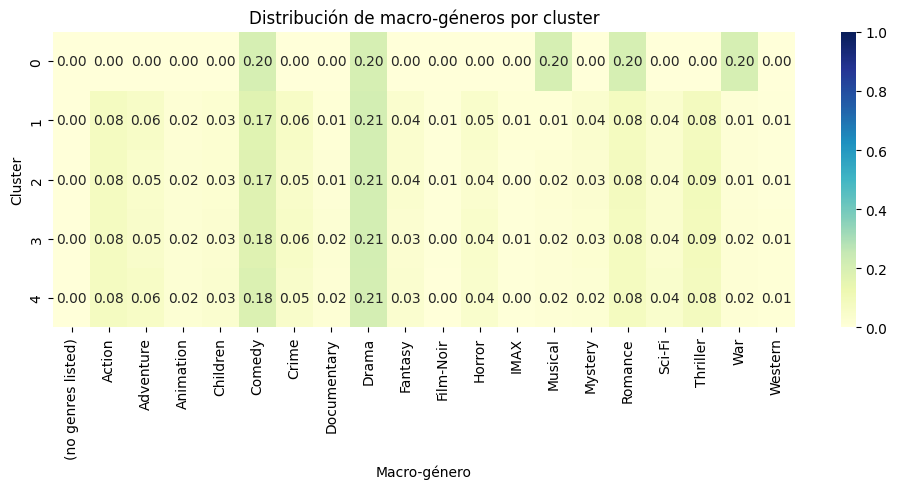

<Figure size 1200x600 with 0 Axes>

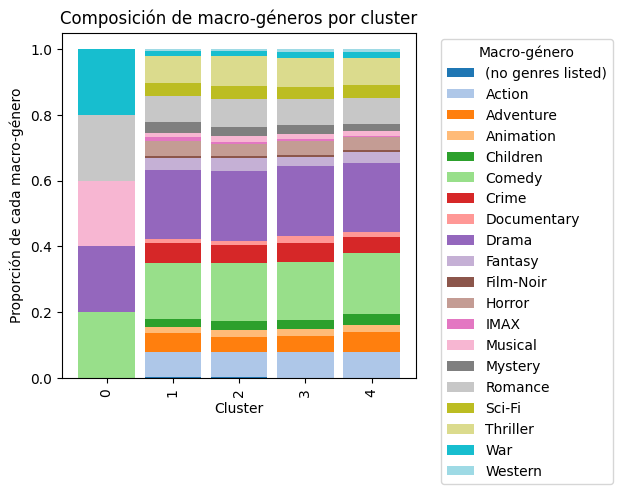

Pureza global promedio: 0.210


In [267]:

# HEATMAP Y BARRAS APILADAS 

plt.figure(figsize=(10, 5))
sns.heatmap(cluster_genres, cmap='YlGnBu', annot=True, fmt=".2f", vmin=0, vmax=1)
plt.title("Distribución de macro-géneros por cluster")
plt.xlabel("Macro-género")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
cluster_genres.plot(kind='bar', stacked=True, colormap='tab20', width=0.85)
plt.title("Composición de macro-géneros por cluster")
plt.xlabel("Cluster")
plt.ylabel("Proporción de cada macro-género")
plt.legend(title="Macro-género", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 5️⃣ Pureza promedio global ---
pureza_global = cluster_genres.max(axis=1).mean()
print(f"Pureza global promedio: {pureza_global:.3f}")

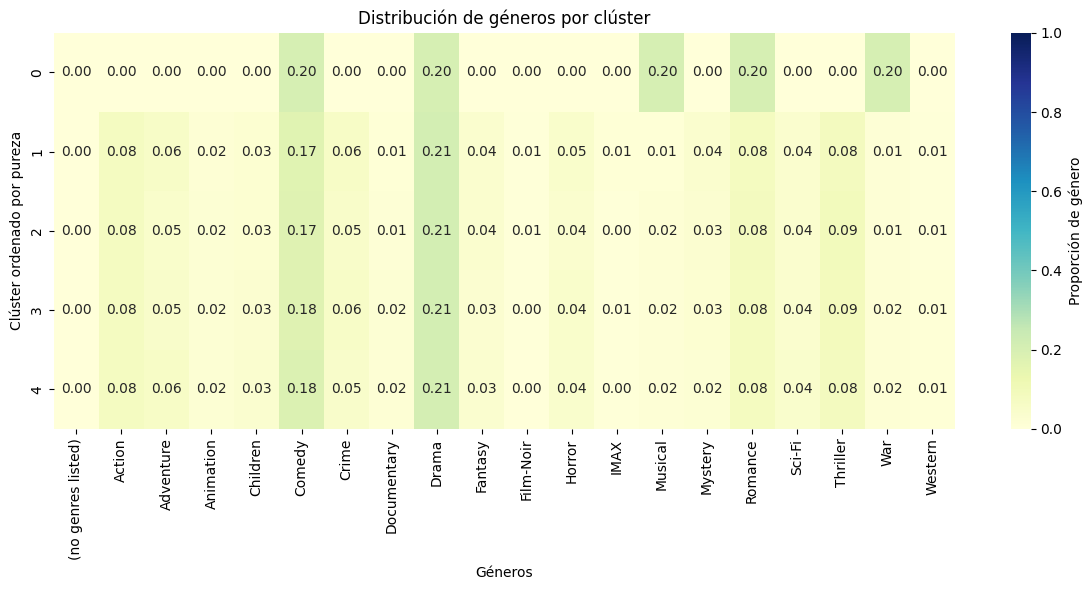

In [268]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    cluster_genres,
    cmap='YlGnBu',          
    annot=True,            
    fmt=".2f",              
    cbar_kws={'label': 'Proporción de género'},
    vmin=0, vmax=1         
)

plt.title("Distribución de géneros por clúster")
plt.xlabel("Géneros")
plt.ylabel("Clúster ordenado por pureza")
plt.tight_layout()
plt.show()
